In [1]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_google = pd.read_csv('googleplaystore.csv')

In [4]:
df_google.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
df_google.shape

(10841, 13)

In [6]:
df_google.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


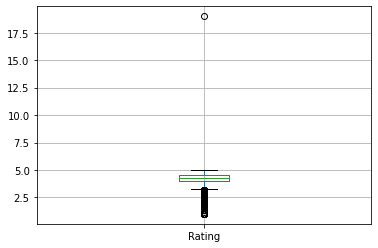

In [7]:
df_google.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d051f6860>]],
      dtype=object)

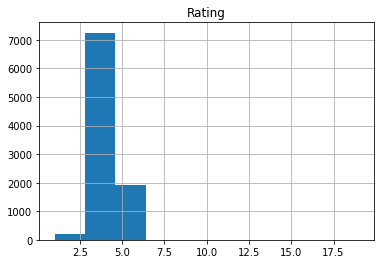

In [8]:
df_google.hist()

In [9]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
#missing data
total = df_google.isnull().sum().sort_values(ascending=False)
percent = (df_google.isnull().sum()/len(df_google)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000
Genres,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


In [11]:
df_google[df_google['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
df_google.shape

(10841, 13)

In [13]:
df_google2 = df_google.drop([10472])
df_google2.shape

(10840, 13)

In [14]:
df_google2[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


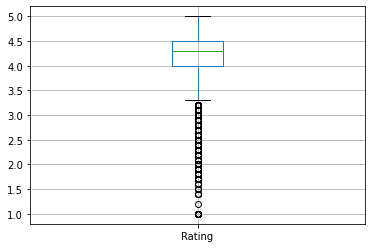

In [15]:
df_google2.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d03a19fd0>]],
      dtype=object)

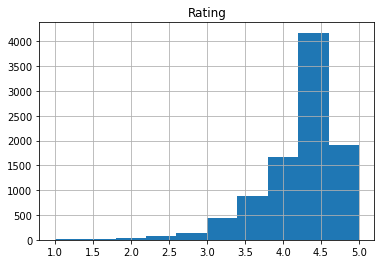

In [16]:
df_google2.hist()

In [17]:
#missing data
total2 = df_google2.isnull().sum().sort_values(ascending=False)
percent2 = (df_google2.isnull().sum()/len(df_google2)).sort_values(ascending=False)
missing_data2 = pd.concat([total2, percent2], axis=1, keys=['Total', 'Percent'])
missing_data2.head(30)

,Total,Percent
Rating,1474,0.135978
Current Ver,8,0.000738
Android Ver,2,0.000185
Type,1,0.000092
Last Updated,0,0.000000
Genres,0,0.000000
Content Rating,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


In [18]:
df_google2['Rating'] = df_google2['Rating'].fillna(df_google2['Rating'].median())
df_google2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [19]:
print(df_google2['Type'].mode())
print(df_google2['Current Ver'].mode())
print(df_google2['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [20]:
df_google2['Type'] = df_google2['Type'].fillna(df_google2['Type'].mode()[0])
df_google2['Current Ver'] = df_google2['Current Ver'].fillna(df_google2['Current Ver'].mode()[0])
df_google2['Android Ver'] = df_google2['Android Ver'].fillna(df_google2['Android Ver'].mode()[0])

In [21]:
df_google2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [22]:
df_google2['Price'] = df_google2['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df_google2['Price'] = df_google2['Price'].apply(lambda x: float(x))
df_google2['Installs'] = df_google2['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df_google2['Installs'] = df_google2['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df_google2['Installs'] = df_google2['Installs'].apply(lambda x: float(x))
df_google2['Reviews'] = df_google2['Reviews'].apply(lambda x: float(x))

In [23]:
df_google2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
df_google2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


In [25]:
df_google2.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [33]:
results_sum = df_google2.groupby('Category').sum().sort_values(by = 'Price', ascending = False)
#results_sum2 = results_sum
results_mean_rating = df_google2.groupby('Category').mean().sort_values(by = 'Rating', ascending = False)
results_mean_reviews = df_google2.groupby('Category').mean().sort_values(by = 'Reviews', ascending = False)
results_mean_installs = df_google2.groupby('Category').mean().sort_values(by = 'Installs', ascending = False)
#len(results_sum.index)
results_mean_reviews.head()

,Rating,Reviews,Installs,Price
Category,,,,
COMMUNICATION,4.180103,2.107138e+06,8.435989e+07,0.214832
SOCIAL,4.261017,2.105903e+06,4.769447e+07,0.054136
GAME,4.286888,1.385859e+06,3.066960e+07,0.251136
PHOTOGRAPHY,4.197910,6.373631e+05,3.011417e+07,0.400627
VIDEO_PLAYERS,4.084000,6.307439e+05,3.555430e+07,0.059771


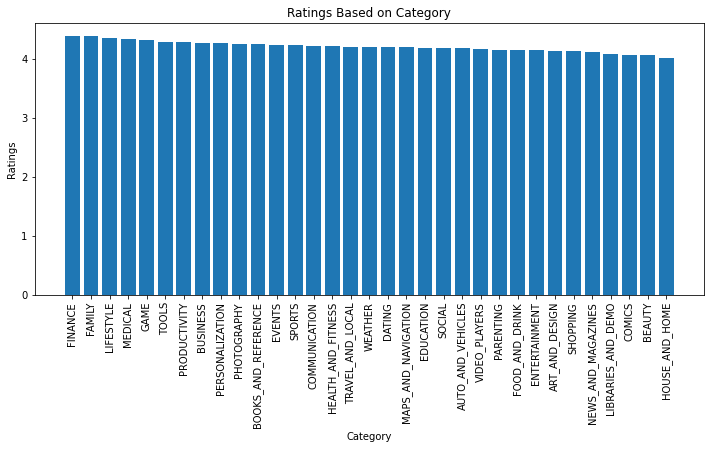

In [29]:
plt.figure(figsize = (12, 5))
plt.bar(results_sum.index, results_mean_rating['Rating'])
plt.xticks(rotation = 90)
#plt.yticks(results_sum['Price'])
plt.title('Ratings Based on Category')
plt.xlabel('Category')
plt.ylabel('Ratings')
plt.show()

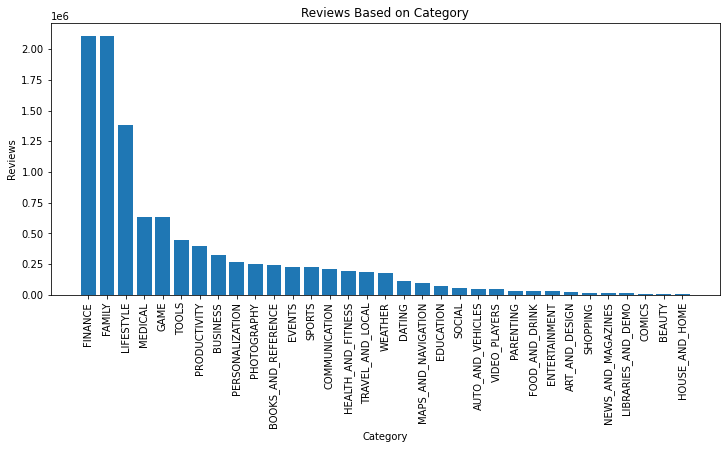

In [34]:
plt.figure(figsize = (12, 5))
plt.bar(results_sum.index, results_mean_reviews['Reviews'])
plt.xticks(rotation = 90)
#plt.yticks(results_sum['Price'])
plt.title('Reviews Based on Category')
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.show()

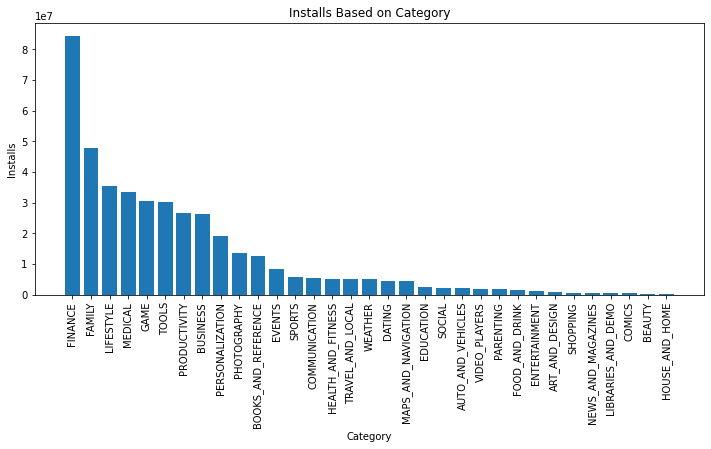

In [35]:
plt.figure(figsize = (12, 5))
plt.bar(results_sum.index, results_mean_installs['Installs'])
plt.xticks(rotation = 90)
#plt.yticks(results_sum['Price'])
plt.title('Installs Based on Category')
plt.xlabel('Category')
plt.ylabel('Installs')
plt.show()

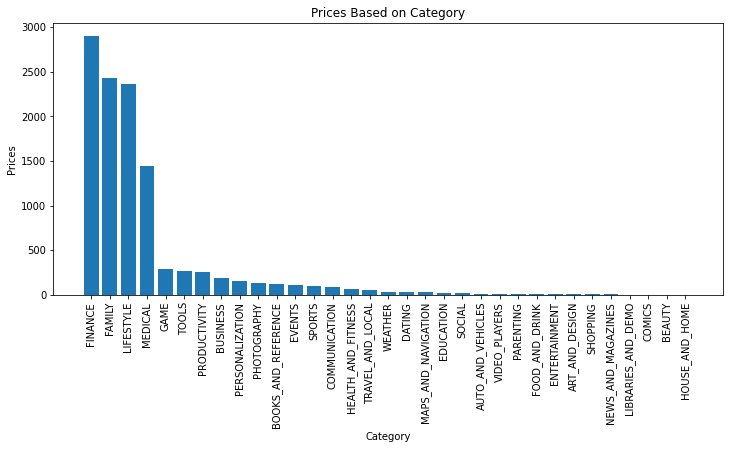

In [28]:
plt.figure(figsize = (12, 5))
plt.bar(results_sum.index, results_sum['Price'])
plt.xticks(rotation = 90)
#plt.yticks(results_sum['Price'])
plt.title('Prices Based on Category')
plt.xlabel('Category')
plt.ylabel('Prices')
plt.show()